<img src="../../Img/backdrop-wh.png" alt="Drawing" style="width: 300px;"/>

<div style="display: block; width: 100%; height: 100px;">

<p style="float: left;">
    <span style="font-weight: bold; font-size: 20px;">
        DIGHUM160 - Critical Digital Humanities 
        <br />
        Instructor: Tom van Nuenen<br />
        Final Project
    </span>
</p>

**Project title:** ```<r/Conspiracy: Theory and Political Bias Online>```

**Student name:** ```<Alyia Sholes>```

Word limit: Between 2500 and 3000 words (excluding code cells, outputs, and references).


In [4]:
# set up the environment

import os
# We include two ../ because we want to go two levels up in the file structure
os.chdir("../Data")
import math
from textblob import TextBlob as tb
import nltk
from nltk.corpus import stopwords
import re
import gensim 
from gensim.models import Word2Vec
import pandas as pd
import logging
import os
import time
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [4]:
!ls

Bargraph.png
BargraphSubreddits.png
NetworkGraph.png
ScatterPlot.png
aita_com_top.csv
aita_com_top_lemmas.json
aita_edges
aita_lda.dict
aita_pos.dict
aita_pos.emb
aita_pos_lda.dict
aita_pos_lda_optimal.model
aita_pos_lda_optimal.model.expElogbeta.npy
aita_pos_lda_optimal.model.id2word
aita_pos_lda_optimal.model.state
aita_pos_lemmas.json
aita_sub_top_lemmas_trigrams.txt
aita_sub_top_sm.csv
aita_sub_top_sm_lemmas.csv
aita_sub_top_sm_lemmas.txt
aita_sub_top_sm_pos_lemmas.csv
aita_sub_top_sm_pos_lemmas_topics.csv
amitheasshole_3_20220320.csv
convergence_liklihood_1_it_1_pa.pdf
gensim.log
submission.csv
submissions (1)2lemmas copy.csv
submissions (1)lemmas.csv
submissions.csv
submissions.emb
submissions.lemmas.csv
submissionslemmas.csv
tsne_model
tsne_vectors.npy


In [5]:
#importing r/Conspiracy submissions 
import pandas as pd

df = pd.read_csv('submissionslemmas.csv')

/var/folders/0n/sbxjddzd72l3nnsd8ph_f9fw0000gn/T/ipykernel_1006/33755815.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('submissionslemmas.csv')


## Introduction

   The r/Conspiracy subreddit, a discussion board about conspiracy theories found on reddit.com has been deemed controversial by online observers (Milner 6). Its discussion topics include controversies like theories about the moon landing, vaccines, and government operations. R/Conspiracy is a very popular, well-known subreddit with 1.8 million members. As a whole, this subreddit acts as an online mirror-image of some of the political discourse in modern life, as it reflects current dialects of political discussion and debate in the USA. Overridden by mythological speech, r/Conspiracy is full of political bias and false information, specifically bias towards the Republican party. I chose to investigate this subreddit to explore the political aspects of conspiracy theories. As someone who grew up watching videos about conspiracy theories on YouTube, I have always wondered “how does political bias intersect with the discussion of conspiracy theories online?.” When reading and submitting to this subreddit, it is important to be aware of who exactly is posting and the bias that is present. This investigation will act as a deep dive into the online world of r/Conspiracy and the political bias behind its submissions, in hopes of making online viewers aware that the majority of information posted is far from factual in spirit and motivation.

## Analysis

1. A Distant Observation, Background:
  Reddit.com is home to many discussion forums, including r/Conspiracy. The people who have access to these forums are those who have access to technology: laptops, computers, tablets, etc. In early 2022, the largest majority of users fell within the 18 to 29-year-old age range. With the users having these specific attributes, the discussions on reddit.com are filled with bias, this being that the opinions and discussions are not representative of the entire population of U.S. citizens. While the r/Conspiracy subreddit gives insight into the discourse, opinions, and views that are popular within the U.S., we must take caution when coming to conclusions about the opinions of those who discuss conspiracy theories online.
A conspiracy theory is defined as “an attempt to explain harmful or tragic events as the result of the actions of a powerful group” (Reid 1). The r/Conspiracy subreddit is an extremely controversial subreddits, as submissions evoke discussion about conspiracy theories that often involve government operations and politicians. The endorsement of conspiracy theories is "associated with the tendency to reject medical advice and important scientific findings" as well as rejecting the validity of anyone or anything that has power over them (Klein 2). Some users post in r/Conspiracy in hopes of discussing and debunking popular conspiracy theories, while others "troll" the subreddit to provoke conspiracy theorists. In one study on r/Conspiracy, it was found that nine out of one hundred posts to the subreddit were determined to be nonserious (Klein 9). That being said, the submissions to the subreddit, while they may be presented as factual information, cannot be trusted.  
      
2. A Close Observation, Machine Learning: 
 In order to take a closer look at submissions to r/Conspiracy and demonstrate the political bias within the r/Conspiracy subreddit, I employed three machine learning techniques whose findings will be analyzed below. However, it is important to keep in mind that these methods may be flawed due to the dataset being representative of a portion of submissions, rather than all of the submissions to the subreddit. The first technique, topic modeling, reveals the structure of topics within a data set. I used this technique to uncover the most widely discussed topics within the submissions to r/Conspiracy. I related some of the topics found to mythological speech in order to demonstrate the presence of possible false information. Then, I looked at actual submissions to the subreddit on reddit.com to analyze the language and find bias within the submissions. Next, I used target sets to find language biases connected to each major political party in the U.S. Finally, I used word embeddings to find related terms that are used in similar ways to the words 'democrat' and 'republican within the subreddit.
 
3. Mythological Speech:
  Mythological speech intends to take the presentation of information and make it look like it is factual while it is actually a false belief (Mambrol 2). The posts in this subreddit often take current events and create theories around them. Sometimes, these theories are communicated in as not just theories but the truth. You can see evidence of this in the topics that are most commonly used in submissions in the conspiracy subreddit community. Using topic modeling, I found that the word "secret" is commonly used within the subreddit (see figure 1). It is easy to communicate people or governments are keeping "secrets" when convincing yourself and audiences that these theories are true. An example of this can be found in a submission posted by a user discussing George W. Bush (u/deleted 1). The user asks the community if they think George W. Bush was having an affair with his assistant Karen Hughes or not. The user then goes on to call this an "open secret." Even though the user does not know whether or not this theory is true, the term "secret" suggests that this did happen but was undisclosed and kept a secret. We cannot confirm from this whether or not the affair was a "secret" or a mere theory, but using language like this makes it sound like the affair with Karen Hughes did occur and was kept secret. People who believe in conspiracies can use this kind of language to theorize about conspiracies and make it seem like these things may have happened when there is a possibility that they did not occur at all. In this way, this subreddit uses mythology to convey a possibly false statement as the truth by they are communicated, as mythology is a form of language (Barthes 10). 

4. Conspiracy, Politics, and Covid-19: 
  Innately, conspiracy theories often involve blaming a government or political body for an event. The language found in the conspiracy subreddit is proof of this, using rhetoric that suggests the discussion of politics within submissions about conspiracy theories related to Covid-19 and other major events. In the topic model below (see figure 2), topic 1 heavily overlapped with others in that one of the top words is related to the Covid-19 pandemic. In this case, one of the top words is vaccinated. Users tend to either be for or against vaccination, and those who are against it blame the government for forcing everyone to get a vaccine that “doesn't work” or is “unnecessary” in their opinion. An example of this can be found in a submission by a user stating that "Unvaccinated people now have the same guidelines as vaccinated people acknowledging that there never was a "vaccine"" (u/MangoSmash 1). This submission reflects the viewpoint that the Covid-19 vaccine was faked by the government. In topic 4 (see figure 3), I found that vaccination is a top word, again displaying that this subreddit frequently discusses vaccine conspiracies. According to a poll conducted by Gallup in September of 2021, 40% of Republicans did not agree with or plan on getting vaccinated, while 92% of Democrats were vaccinated (Gallup 1). While it cannot be confirmed that each user submitting to r/Conspiracy is of a specific political party, the language used in this subreddit when discussing vaccines shows bias towards the Republican Party’s tendencies of not believing the vaccine is real and/or necessary.
  
5. Political Biases in Language, Alex Jones, and Infowars:  
  For the language bias segment of my project, I used words relating to two of the major political parties to investigate political bias and discussions within the subreddit. My list 1 words included:
       Democrat, Liberal, Bernie, Biden, Liberal, Left, and Liberalism
My list two words included:
       Republican, Trump, Alex, Jones, Conservative, Right, and Republicanism
When finding biased words in each list (see figure 4), I found that the biased words in list one included "terrible," "lazy," "hypocrisy," "rot," and "miserable." This demonstrates that democrats, Bernie Sanders, Joe Biden, and others who have liberal political beliefs are not discussed in a positive light within the submissions to the subreddit, as all of these words have a negative connotation. When looking at biased words for list two (see figure 4), some of the words included "truthers," "incorrect," "lawsuit," and "banned." The only word in this set that suggested any negative opinion rather than conspiracy discussion was "incorrect." These findings suggest that when submissions talk about Republicans, Donald Trump, Alex Jones, and anyone with conservative beliefs they are discussed in a better light that the Democratic party. Even though some users may believe the people or beliefs of the Republican party are incorrect, they do not deem them "terrible," "lazy," or "miserable" as often as those words associated with the discussion of the Democratic party, further demonstrating that users who submit to the subreddit are biased towards the beliefs and the Republican party. 
The scatter plot below (see figure 5) shows words relating to those in each set and clusters them by similar meanings. You can see that the words relating to each political party being examined are not clustered together very closely as the red is separated from the blue except in the very middle of the plot. I found it interesting that the list grouped together left-leaning and radical very closely in the blue section of the plot, this means that these two phrases are used in similar ways within the subreddit. The grouping of these two words together suggests that users within the subreddit believe that left-leaning beliefs are radical. In the red section, Alex Jones is grouped together with truthers, which is another word for a conspiracy theorist who does not accept common explanations of an event (Cambridge 1).
    Alex Jones is a well-known conspiracy theorist and far-right radio personality (SPLC 1). I found that his blog called "Infowars" was a common topic within the subreddit using the "get_related_terms" function using Word Embeddings (see figure 6). Infowars posts news articles that align with far-right conservative views (SPLC 3). One article discusses the CDC's info page about the Covid-19 vaccine and puts quotes around "vaccine" with every mention of the word (McBreen 2). This and other articles on the site support the notion that the majority of users on r/Conspiracy support conservative, far-right views as this article expresses similar viewpoints in regards to the Covid-19 vaccine on a well-known far-right blog. One opinion posted by author William Anderson states that "All one can say to those that are demanding a criminal prosecution of the former president is: Be careful what you wish for; you just might get it" (Anderson 4). This opinion states that the author is against the prosecution of former Republican President Donald Trump. It goes on to criticize Democrats and President Joe Biden for encouraging the prosecution of Donald Trump, revealing that the author does not agree with the Democratic party. 
   How do the articles and opinions on Alex Jones's Infowars blog relate to the submissions to r/Conspiracy? When searching Infowars on r/Conspiracy, I found many posts discussing the blog, Alex Jones, and Donald Trump. While some posts simply put out information stating that Alex Jones failed to defend one of his conspiracy theories in his trial, other posts defend the truther. One post to the subreddit states that because of the "fake war with Russia" Infowars and other Independent news outlets are being wrongfully shut down (u/deleted 1). Another submission states that they want to start an "Infowars/Alex Jones" subreddit where people can post what they call "relevant conspiracies" from the Infowars blog (u/Alex-E-Jones 1). These submissions, and many more, clearly support the views of Alex Jones and the opinions on Infowars. This is further evidence that many users on the r/Conspiracy subreddit are biased toward far-right conservative viewpoints, even if they don't explicitly state their political party preferences in their submissions. 

6. Related Terms and Political Bias: 
  Next, I used related terms to further examine biases present in the subreddit. When finding similar terms for the word “Democrat” (see figure 7) some of the related terms generated are republican, liberal, Bernie, demoncrats, and unelectable. The ones I found the most interested were demoncrats and unelectable, which suggest that some submissions to r/Conspiracy criticize Democrats especially political candidates for the Democratic party. An example of this can be found in a submission stating "I can't wait for AOC to lie under oath. I can't believe demoncrats voted for this witness" (u/Xianbi 1). This submission simultaneously criticizes the Democratic party and a Democratic political figure, further exemplifying anti-democrat views found within the subreddit. The bias found here is that based on the terms Demoncrat and Unelectable, it seems like people who are against Democratic policies and candidates are the ones discussing conspiracy theories about them, proving that these theories may not be factually accurate but rather rooted in political bias. 
  I also ran the related terms code on the word “Republican” (see figure 8). When doing so, some of the related terms generated were abortion_activist_howard, GOP, democrat, degree_sodomy, and gardner_admitted. This word didn’t seem to have related words like “demoncrat” or “unelectable” suggesting that within the subreddit, Republicans are discussed in a less satirical light than Democrats. After further research, I found that the abortion_activist_howard term is referring to Howard Scott Heldreth, an anti-abortion Republican activist who has been charged with committing sexual crimes against children (u/Bejanon_Franklin 1). I also found that degree_sodomy is referring to the crime of sodomy, which involves forcing someone to engage in sexual conduct (Oregon 1). This could be related to the discussion of Republican politicians being charged with this or any conspiracy theories around it. Overall, the discussion of Republicans on the subreddit is focused on news and conspiracy theories rather than insulting the party or its candidates.

### This is a subsection

\< load the data \>

In [6]:
#section 4: Conspiracy, Politics, and Covid-19
lemmas_split = [lemmas.split() for lemmas in df['lemmas']]

In [7]:
#splitting up lemmas in the lemmas column of the dataset
lemmas_split[0]

['http://www.telegraph.co.uk/culture/culturepicturegalleries/4220575/blackjack.htmlblackjack',
 'image',
 '15hex',
 '>',
 'stringthis',
 'simp?ly',
 'entertainment',
 'slide',
 'removed',
 'days_ago',
 'code',
 'final',
 'warng',
 'th?is',
 'site',
 'warnings',
 'given',
 'jackblack12.?info',
 'beware',
 'ardent',
 'sentry',
 'alert',
 'semis',
 'bearing',
 's?un',
 'icon',
 'federal',
 'autho?rities',
 'involvedardent',
 'sentry',
 'taking',
 'place',
 'right',
 '24th',
 'http://www.northcom.mil/news/2009/060909.html']

In [8]:
#importing gensim 
from gensim import corpora, models, similarities
from gensim.models.coherencemodel import CoherenceModel

dictionary = corpora.Dictionary(lemmas_split)

dictionary.filter_extremes(no_below=10, no_above=0.4)
dictionary.compactify() 

dictionary.save('aita_lda.dict')

corpus = [dictionary.doc2bow(text) for text in lemmas_split]


In [9]:
#importing LdaModel in order to creata a model of the data
from gensim.models.ldamodel import LdaModel

%time
lda_model = LdaModel(corpus=corpus,   
            id2word=dictionary,       
            num_topics=20,            
            random_state=100,        
            passes=2,                  
            per_word_topics=False)  

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 9.06 µs


<To discuss and analyse a piece of data or a result, use a markdown cell>

In [10]:
#importing pyLDAvis to seperate the dataset into topics to create a topic modeling model of the data
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, corpus, dictionary)
lda_viz

/Users/alyiasholes/Documents/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/alyiasholes/Documents/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/alyiasholes/Documents/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/alyiasholes/Documents/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.208855  0.050513       1        1  15.028166
0      0.213760  0.205421       2        1   8.630019
16     0.108691 -0.024899       3        1   8.111879
5      0.128416  0.141689       4        1   7.486850
14    -0.010920 -0.169798       5        1   6.864783
2      0.048815 -0.065245       6        1   6.074407
1      0.057807 -0.164658       7        1   5.724491
4      0.034304 -0.107985       8        1   5.250998
3      0.151313  0.225492       9        1   5.038933
7     -0.035101 -0.156569      10        1   4.857053
17     0.128513  0.094937      11        1   4.399086
8      0.051892 -0.011113      12        1   4.157216
18     0.046139 -0.116596      13        1   4.139139
19     0.068839 -0.095618      14        1   4.084047
6     -0.056750 -0.226439      15        1   3.551122
11    -0.116712  0.000610      16        1   2.017084
12    -0.251531  0.120725      17        1   1.453036
13    -0.201100  0.110689      18        1   1.243278
15    -0.310691  0.105539      19        1   1.013653
10    -0.264541  0.083305      20        1   0.874761, topic_info=         Term           Freq          Total Category  logprob  loglift
2324  vaccine   63627.000000   63627.000000  Default  30.0000  30.0000
1353        =   51044.000000   51044.000000  Default  29.0000  29.0000
43     people  222723.000000  222723.000000  Default  28.0000  28.0000
254     world   87981.000000   87981.000000  Default  27.0000  27.0000
39       like  143587.000000  143587.000000  Default  26.0000  26.0000
...       ...            ...            ...      ...      ...      ...
1579  numbers    1947.600257    8326.333338  Topic20  -4.4103   3.2861
5930   county    1313.865179    2901.474248  Topic20  -4.8039   3.9467
4968      gov    1250.539408    2708.990631  Topic20  -4.8533   3.9660
2199    party    1302.650310    7187.048541  Topic20  -4.8125   3.0311
550     texas    1129.027933    3231.447122  Topic20  -4.9556   3.6874

[1393 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
1351       4  0.000322               $
1351       5  0.006448               $
1351       7  0.972452               $
1351      13  0.002821               $
1351      14  0.017811               $
...      ...       ...             ...
1341      17  0.000108         youtube
2046       2  0.997110  youtube_videos
4720      10  0.998149         zionist
11262     18  0.998383         zombies
10666     13  0.999858               |

[5321 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 17, 6, 15, 3, 2, 5, 4, 8, 18, 9, 19, 20, 7, 12, 13, 14, 16, 11])

In [4]:
# Topic model of different words that are frequently mentioned within the dataset seperated into topics that distinguish them by term frequency in and out of the selected topic

### This is a subsection

\< select interesting data \>


In [5]:
# section 6: Related Terms and Political Bias/section 5: Political Biases in Language, Alex Jones, and Infowars

In [11]:
#importing the datatset for this section
import pandas as pd 


df = pd.read_csv('submissionslemmas.csv')
df.head(3)

/var/folders/0n/sbxjddzd72l3nnsd8ph_f9fw0000gn/T/ipykernel_17044/1851960257.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('submissionslemmas.csv')


idint     idstr     created  nsfw         author  \
0  14832284  t3_8twnw  1245420893   0.0      [deleted]   
1  14895350  t3_8v9bq  1245858352   0.0  Satori_Seeker   
2  14926836  t3_8vxmc  1246029281   0.0   Fountainhead   

                                               title  \
0  messages found in the Telegraph's curious oper...   
1  Why are some of us truth seekers who care abou...   
2  Why does LA still have the shittiest air in Am...   

                                            selftext  \
0  http://www.telegraph.co.uk/culture/culturepict...   
1  In my day to day life I run into absolutely no...   
2  Because it's a conspiracy.  Seriously.  that's...   

                                              lemmas  score distinguish  \
0  http://www.telegraph.co.uk/culture/culturepict...   26.0         NaN   
1  day day life run absolutely classify awake mai...    4.0         NaN   
2  conspiracy seriously reason challenge refute p...    1.0         NaN   

   textlen  num_comments flair_text flair_css_class  
0    539.0          21.0        NaN             NaN  
1    444.0          11.0        NaN             NaN  
2    162.0           7.0        NaN             NaN

\< More discussion \>

In [12]:
df = df[~df['selftext'].isin(['[removed]', '[deleted]' ])].dropna(subset=['selftext'])
df = df[df['selftext'].str.len()>=15]
len(df)

264897

In [13]:
#importing spacy in order to create the model with the language from the dataset
import spacy
nlp = spacy.load('en_core_web_sm')
from gensim.models.phrases import Phrases, Phraser

def clean(token):
    """
    helper function to eliminate tokens
    that are pure punctuation, whitespace, or digits
    """
    return token.is_punct or token.is_space or token.is_digit

def line_read(df):
    """
    generator function to read in text from df
    and get rid of line breaks in the text
    """    
    for text in df.selftext:
        yield text.replace('\n', '')

def preprocess(df, allowed_postags=['NOUN', 'ADJ']):
    for parsed in nlp.pipe(line_read(df), batch_size=1000, disable=["tok2vec", "ner"]):
        lemmas = [token.lemma_.lower() if token.lemma_ != '-PRON-' else token.lower_ 
                    for token in parsed if not clean(token)]
        lemmas_c = [l for l in lemmas if not l in ["'s",  "’s", "’"] and not l in allowed_postags]
        nostops = [term for term in lemmas_c if term not in spacy.lang.en.stop_words.STOP_WORDS]
        yield nostops

In [14]:
#precprocessing the dataset language 
lemmas = [line for line in preprocess(df)]

In [15]:
#creating bigrams and trigrams 
bigram = Phrases(lemmas, min_count=20, threshold=300)
trigram = Phrases(bigram[lemmas], min_count=20, threshold=100)  
bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

def make_bigrams(texts):
    return [bigram_phraser[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_phraser[bigram_phraser[doc]] for doc in texts]

#forming trigrams
trigrams = make_trigrams(lemmas)


In [16]:
#importing multiprocessing
from gensim.models import Word2Vec
import multiprocessing

cores = multiprocessing.cpu_count() # Count the number of cores you have at your disposal
num_features = 300        # Word vector dimensionality (how many features each word will be given)
min_word_count = 10        # Minimum word count to be taken into account
num_workers = cores       # Number of threads to run in parallel (equal to your amount of cores)
context = 5               # Context window size
downsampling = 1e-2       # Downsample setting for frequent words
seed_n = 1                # Seed for the random number generator (to create reproducible results) 
sg_n = 1                  # Skip-gram = 1, CBOW = 0
epochs = 20

#setting up to create a Word2vec model 
model = Word2Vec(trigrams, workers=num_workers, \
            vector_size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling, seed=seed_n, sg=sg_n)

In [18]:
model.train(trigrams, total_examples=model.corpus_count, epochs=10)    

(190523020, 203327610)

In [24]:
#finding how many terms are available, more data = less bias results 
print('{:,} terms in the vocabulary.'.format(len(model.wv)))

60,597 terms in the vocabulary.


In [26]:
def get_related_terms(token, topn=20):
    """
    look up the topn most similar terms to token and print them as a formatted list
    """

    for word, similarity in model.wv.most_similar(positive=[token], topn=topn):
        print(word, round(similarity, 3))

In [27]:
#finding related terms as discussed in the analysis 
get_related_terms('alex_jones')

infowars 0.627
bill_hicks 0.55
jones 0.53
pjw 0.523
alex 0.516
joe_rogan 0.515
molyneux 0.497
eddie_bravo 0.487
kokesh 0.485
aj 0.484
mark_dice 0.483
jone 0.481
noory 0.478
mike_cernovich 0.477
rense 0.47
alex_jones_infowars 0.462
kevin_booth 0.458
paul_joseph_watson 0.449
david_icke 0.448
index.php?pg 0.441


In [28]:
get_related_terms('democrat')

democrats 0.657
republican 0.657
republicans 0.605
liberal 0.576
dem 0.566
gop 0.54
https://outline.com/tbrsbe/ 0.522
dems 0.52
democratic 0.496
democratic_party 0.495
trump 0.48
conservative 0.479
bernie 0.472
republican_party 0.471
leftist 0.468
left_wing 0.463
supporters 0.46
biden 0.459
sanders 0.458
conservatives 0.455


In [29]:
get_related_terms('republican')

democrat 0.657
republicans 0.594
swartz_pleaded_guilty 0.591
gop 0.59
scott_heldreth 0.589
abortion_activist_howard 0.588
⁠republican 0.58
girl.• 0.569
degree_sodomy 0.562
democratic 0.561
pleaded_guilty_exposing 0.561
politician_keith_westmoreland 0.559
\*republican 0.558
grunseth 0.557
marty_glickman_a.k.a 0.55
pleaded_contest_fondling 0.549
earl_butch 0.542
host_jon_matthews 0.54
john_hathaway 0.539
republican_party 0.538


In [32]:
#section 5: Political Biases in Language, Alex Jones, and Infowars
#using gensim to create a model
from gensim.models import Word2Vec
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from operator import itemgetter
from scipy import spatial
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
import inflect
import numpy as np
import statistics
import itertools

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import datetime
import statistics

def _calculate_centroid(model, wordlist):
    '''
    Calculate centroid of the wordlist list of words based on the model embedding vectors
    '''
    centr = np.zeros( len(model.wv[wordlist[0]]) )
    for w in wordlist:
        centr += np.array(model.wv[w])
    return centr/len(wordlist)

def _keep_only_model_words(model, words):
    aux = [ word for word in words if word in model.wv.index_to_key]
    return aux

def _get_word_freq(model, word):
    if word in model.wv.index_to_key:
        index = model.wv.key_to_index[word]
        count = model.wv.get_vecattr(word, "count")
        return [word, count, index]
    return None

def _get_model_min_max_rank(model):
    minF = 999999
    maxF = -1
    for w in model.wv.index_to_key:
        rank = model.wv.key_to_index[w]
        if(minF>rank):
            minF = rank
        if(maxF<rank):
            maxF = rank
    return [minF, maxF]

sid = SentimentIntensityAnalyzer()
def _get_sentiment(word):
    return sid.polarity_scores(word)['compound']

'''
Normalises a value in the positive space
'''    
def _normalise(val, minF, maxF):
    #print(val, minF, maxF)
    if(maxF<0 or minF<0 or val<0):
        raise Exception('All values should be in the positive space. minf: {}, max: {}, freq: {}'.format(minF, maxF, val))
    if(maxF<= minF):
        raise Exception('Maximum frequency should be bigger than min frequency. minf: {}, max: {}, freq: {}'.format(minF, maxF, freq))
    val -= minF
    val = val/(maxF-minF)
    return val

def _get_cosine_distance(wv1, wv2):
    return spatial.distance.cosine(wv1, wv2)

def _get_min_max(dict_value):
    l = list(dict_value.values())
    return [ min(l), max(l)]

def _find_stdev_threshold_sal(dwords, stdevs):
    '''
    dword is an object like {'word':w, 'bias':bias, 'biasW':biasW, 'freq':freq, 'freqW':freqW, 'sal':val, 'wv':wv, 'sent':sent }
    stdevs : minimum stdevs for which we want to compute the threshold

    returns
    outlier_thr : the threshold correpsonding to stdevs considering salience values from the dwrods object list
    '''
    allsal = []
    for obj in dwords:
        allsal.append(obj['sal'])
    stdev = statistics.stdev(allsal)
    outlier_thr = (stdev*stdevs)+sum(allsal)/len(allsal)
    return outlier_thr

def calculate_biased_words(model, targetset1, targetset2, stdevs, 
                         acceptedPOS = ['JJ', 'JJS', 'JJR','NN', 'NNS', 'NNP', 'NNPS','VB', 'VBG', 'VBD', 'VBN', 'VBP', 'VBZ' ], 
                         words = None, force=False):
    '''
    this function calculates the list of biased words towards targetset1 and taregset2 with salience > than the 
    specified times (minstdev) of standard deviation.

    targetset1 <list of strings> : target set 1
    targetset2 <list of strings> : target set 2
    minstdev int : Minium threhsold for stdev to select biased words
    acceptedPOS <list<str>> : accepted list of POS to consider for the analysis, as defined in NLTK POS tagging lib. 
                              If None, no POS filtering is applied and all words in the vocab are considered
    words list<str> : list of words we want to consider. If None, all words in the vocab are considered
    '''
    if(model is None):
        raise Exception("You need to define a model to estimate biased words.")
    if(targetset1 is None or targetset2 is None):
        raise Exception("Target sets are necessary to estimate biased words.")
    if(stdevs is None):
        raise Exception("You need to define a minimum threshold for standard deviation to select biased words.")
   
    tset1 = _keep_only_model_words(model, targetset1) # remove target set words that do not exist in the model
    tset2 = _keep_only_model_words(model, targetset2) # remove target set words that do not exist in the model

    # We remove words in the target sets, and also their plurals from the set of interesting words to process.
    engine = inflect.engine()
    toremove = targetset1 + targetset2 + [engine.plural(w) for w in targetset1] + [engine.plural(w) for w in targetset2]
    if(words is None):
        words = [w for w in list(model.wv.index_to_key) if w not in toremove]

    # Calculate centroids 
    tset1_centroid = _calculate_centroid(model, tset1)
    tset2_centroid = _calculate_centroid(model, tset2)
    [minR, maxR] = _get_model_min_max_rank(model)

    # Get biases for words
    biasWF = {}
    biasWM = {}
    for i, w in enumerate(words):
        p = nltk.pos_tag([w])[0][1]
        if acceptedPOS is not None and p not in acceptedPOS:
            continue
        wv = model.wv[w]
        diff = _get_cosine_distance(tset2_centroid, wv) - _get_cosine_distance(tset1_centroid, wv)
        if(diff>0):
            biasWF[w] = diff
        else:
            biasWM[w] = -1*diff

    # Get min and max bias for both target sets, so we can normalise these values later
    [minbf, maxbf] = _get_min_max(biasWF)
    [minbm, maxbm] = _get_min_max(biasWM)

    # Iterate through all 'selected' words
    biased1 = []
    biased2 = []
    for i, w in enumerate(words):
        # Print('..Processing ', w)
        p = nltk.pos_tag([w])[0][1]
        if acceptedPOS is not None and p not in acceptedPOS:
            continue
        wv = model.wv[w]
        # Sentiment
        sent = _get_sentiment(w)
        # Rank and rank norm
        freq = _get_word_freq(model, w)[1]
        rank = _get_word_freq(model, w)[2]
        rankW = 1-_normalise(rank, minR, maxR) 

        # Normalise bias
        if(w in biasWF):
            bias = biasWF[w]
            biasW = _normalise(bias, minbf, maxbf)
            val = biasW * rankW
            biased1.append({'word':w, 'bias':bias, 'biasW':biasW, 'freq':freq, 'rank':rank, 'rankW':rankW, 'sal':val, 'wv':wv.tolist(), 'sent':sent } ) 
        if(w in biasWM):
            bias = biasWM[w]
            biasW = _normalise(bias, minbm, maxbm)
            val = biasW * rankW
            biased2.append({'word':w, 'bias':bias, 'biasW':biasW, 'freq':freq, 'rank':rank, 'rankW':rankW, 'sal':val, 'wv':wv.tolist(), 'sent':sent } ) 

    # Calculate the salience threshold for both word sets, and select the list of biased words (i.e., which words do we discard?)
    stdevs1_thr = _find_stdev_threshold_sal(biased1, stdevs)
    stdevs2_thr = _find_stdev_threshold_sal(biased2, stdevs)
    # biased1.sort(key=lambda x: x['sal'], reverse=True)
    b1_dict = {}
    for k in biased1:
        if(k['sal']>=stdevs1_thr):
            b1_dict[k['word']] = k
    # biased2.sort(key=lambda x: x['sal'], reverse=True)
    b2_dict = {}
    for k in biased2:
        if(k['sal']>=stdevs2_thr):
            b2_dict[k['word']] = k

    #transform centroid tol list so they become serializable
    tset1_centroid = tset1_centroid.tolist() 
    tset2_centroid = tset2_centroid.tolist()
    return [b1_dict, b2_dict]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alyiasholes/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alyiasholes/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
# getting similar words
sims = model.wv.most_similar('vaccine', topn=10)  # get other similar words
sims

[('vaccines', 0.8424035310745239),
 ('vax', 0.7571789026260376),
 ('jab', 0.7375407218933105),
 ('vaccination', 0.7351820468902588),
 ('vaccinated', 0.6868561506271362),
 ('vaccinations', 0.65278559923172),
 ('covid', 0.6171948313713074),
 ('covid-19', 0.5992880463600159),
 ('vaxx', 0.593616247177124),
 ('jabs', 0.5778201222419739)]

In [34]:
#inputting words into list 1 and list 2
t1=["democrat" , "liberal" , "bernie" , "biden" , "joe" , "liberal" , "left" , "liberalism"]
t2=["republican" , "trump" , "donald" , "alex" , "jones" , "conservative" , "right" , "republicanism"] 

[b1, b2] = calculate_biased_words(model, t1, t2, 4)

In [35]:
#finding biased words for each set 
print('Biased words towards target set 1')
print( [w for w in b1.keys()] )
print()
print('Biased words towards target set 2')
print( [w for w in b2.keys()] )

Biased words towards target set 1
['feel', 'narrative', 'push', 'economic', 'happy', 'hide', 'canada', 'feels', 'quick', 'dream', 'dnc', 'sudden', 'communist', 'joe_biden', 'racism', 'surprise', 'woke', 'communism', 'warfare', 'electric', 'socialist', 'authoritarian', 'left_wing', 'progressive', 'middle_class', 'gender', 'socialism', 'leftist', 'select', 'imagination', 'dems', 'communists', 'button', 'conditioning', 'efficient', 'wage', 'boring', 'brutal', 'marxist', 'realistic', 'horrific', 'screwed', 'fuckin', 'scream', 'privilege', 'behave', 'leftists', 'farms', 'paradise', 'dementia', 'coke', 'obamacare', 'sjw', 'primaries', 'orwellian', 'overt', 'uber', 'predator', 'trudeau', 'left_leaning', 'shaming', 'populated', 'gradual', 'kamala', 'thankful', 'eyed', 'deadlier', 'feminists', 'progressives', 'runner', 'electrons', 'utopian', 'degeneracy', 'sjws', 'politically_correct', 'shocks', 'dysfunctional', 'commie', 'caffeine', 'brag', 'trough', 'millennial', 'rural_areas', 'exhaustion',

In [36]:
import pandas as pd
import gensim
import nltk.data
import numpy as np
from scipy import spatial
from sklearn.cluster import KMeans
import sklearn
#clustering the data from the target sets 
'''
TARGET SET 1
'''
t1_embeddings = [b1[w]['wv'] for w in b1] # t1 embeddings = list of embeddings of words biased towards target set 1
t1_words = [w for w in b1.keys()]

# Clustering
rangek = range(2, int((len(t1_embeddings)/2)-1) ) # Clusters should be min size 2 at max half of the amount of words (speeding up + forcing clusters)
print('[Testing', rangek, 'clusters]')
kmeans_p = [ KMeans(n_clusters=k).fit_predict(t1_embeddings) for k in rangek] 
kmeans_sil = [ sklearn.metrics.silhouette_score(t1_embeddings, labels) for labels in kmeans_p] 
print('[Silhouette values', kmeans_sil)
indexmaxsil =  kmeans_sil.index(max(kmeans_sil))
print('[Max silhouette, ', max(kmeans_sil), '; index_k: ',indexmaxsil,']')

clusters1 = {}
for i, index in enumerate(kmeans_p[indexmaxsil]): # returns list of cluster index, telling you which cluster each word belongs to 
    if(index in clusters1):
        clusters1[index].append(t1_words[i])
    else:
        clusters1[index]  = [t1_words[i]]
        
        
'''
TARGET SET 2
'''
t2_embeddings = [b2[w]['wv'] for w in b2]
t2_words = [w for w in b2.keys()]

# Clustering
rangek = range(2, int((len(t2_embeddings)/2)-1) )
print('[Testing', rangek, 'clusters]')
kmeans_p = [ KMeans(n_clusters=k).fit_predict(t2_embeddings) for k in rangek ] 
kmeans_sil = [ sklearn.metrics.silhouette_score(t2_embeddings, labels) for labels in kmeans_p] 
print('[Silhouette values', kmeans_sil)
indexmaxsil =  kmeans_sil.index(max(kmeans_sil))
print('[Max silhouette, ', max(kmeans_sil), '; index_k: ',indexmaxsil,']')

clusters2 = {}
for i, index in enumerate(kmeans_p[indexmaxsil]):
    if(index in clusters2):
        clusters2[index].append(t2_words[i])
    else:
        clusters2[index]  = [t2_words[i]]

[Testing range(2, 47) clusters]
[Silhouette values [0.012996397318828535, 0.008335229479468964, 0.01960957904330125, 0.010574050689531081, -0.004553016146951968, 0.017951040797472517, 0.014496253208815977, -0.0011837770238675605, 0.009110754848499783, -0.008034245656561401, 0.009174758836328104, 0.0175394950678594, 0.002068092066316662, -0.009962571900117472, 0.007028498385988795, 0.0034065282215651146, 0.009298998362867643, 0.008670304169622388, 0.015555361455292275, 0.009369302222295314, 0.011803371054155439, 0.006177233883909162, 0.0034064494924479828, -0.003045023950012427, 0.012860281945896892, 0.0038923796285234833, -0.008938539858113102, 0.0012013605250398177, 0.006311069654961574, -0.008657202644873326, 0.007011158028064562, -0.019979141760420135, 0.002541424425102225, 0.004987579426474956, 0.010503681445625685, 0.009148893444869723, 0.008986593664341461, -0.01207375726399608, 0.0163817780305569, 0.009881809019284015, 0.012007868740718769, 0.006741773103721964, -0.0035252449443

In [37]:
#printing the clusters 
print('Clusters target set 1')
print( list( clusters1.values()) )        

print('Clusters target set 2')
print( list( clusters2.values()) )     

Clusters target set 1
[['feel', 'narrative', 'push', 'happy', 'hide', 'canada', 'feels', 'quick', 'dream', 'sudden', 'surprise', 'woke', 'warfare', 'electric', 'select', 'imagination', 'button', 'conditioning', 'efficient', 'boring', 'brutal', 'realistic', 'horrific', 'screwed', 'fuckin', 'scream', 'behave', 'farms', 'paradise', 'coke', 'overt', 'predator', 'shaming', 'populated', 'gradual', 'thankful', 'deadlier', 'electrons', 'shocks', 'dysfunctional', 'caffeine', 'brag', 'trough', 'rural_areas', 'exhaustion', 'intrusive', 'spoon_fed', 'resilient', 'donuts', 'spoiler_alert', 'favoring', 'sanitized', 'douche', 'guerrilla'], ['economic', 'communist', 'racism', 'communism', 'socialist', 'authoritarian', 'left_wing', 'progressive', 'middle_class', 'gender', 'socialism', 'leftist', 'communists', 'wage', 'marxist', 'privilege', 'obamacare', 'sjw', 'orwellian', 'uber', 'trudeau', 'left_leaning', 'feminists', 'utopian', 'degeneracy', 'sjws', 'politically_correct', 'commie', 'systemic_racism'

In [38]:
# prepare the data for the tsne to create the plot

labels1 = [] # labels = words
y1 = []
embs1 = []
for k in clusters1:
    labels1 += clusters1[k]
embs1 = [model.wv[j] for j in labels1]
y1 = len(labels1)*[0]

labels2 = []
y2 = []
embs2 = []
for k in clusters2:
    labels2 += clusters2[k]
embs2 = [model.wv[j] for j in labels2]
y2 = len(labels2)*[1]

labels = labels1 +labels2
y      = y1 +y2
embs   = embs1 + embs2


/Users/alyiasholes/Documents/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/alyiasholes/Documents/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/alyiasholes/Documents/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/alyiasholes/Documents/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


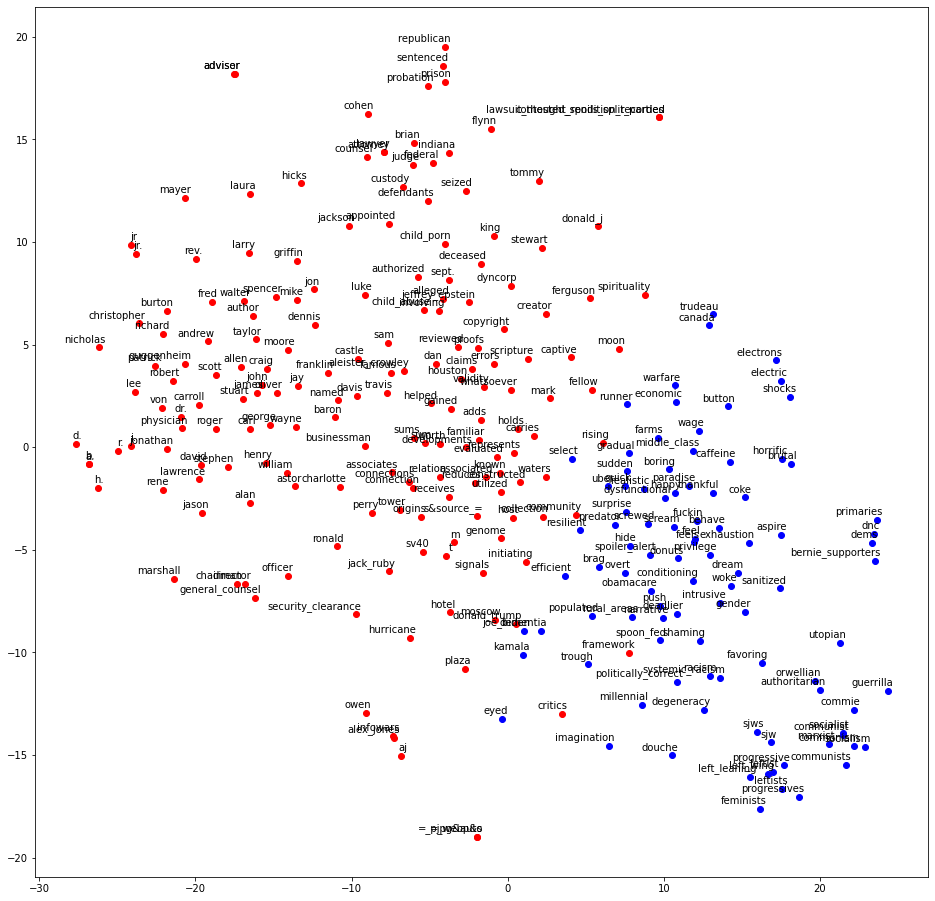

In [39]:
#creating the plot with TSNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

tsne = TSNE(perplexity=10, n_components=2, init='pca', n_iter=5000, random_state=42)
X_tsne = tsne.fit_transform(embs) # X_tsne = [[1,2], [3,4], [5,6]]


# split the X and Y coordinates
embsx = [x[0] for x in X_tsne]
embsy = [x[1] for x in X_tsne]
color = ['blue' if i == 0 else 'red' for i in y]

plt.figure(figsize=(16, 16)) 
for i in range(len(embs)):
    plt.scatter(embsx[i],embsy[i], c=color[i])
    plt.annotate( labels[i],
                  xy=(embsx[i],embsy[i]),
                  xytext=(6, 3),
                  textcoords='offset points',
                  ha='right',
                  va='bottom')
plt.show()

### This is a subsection

\< discuss results \>

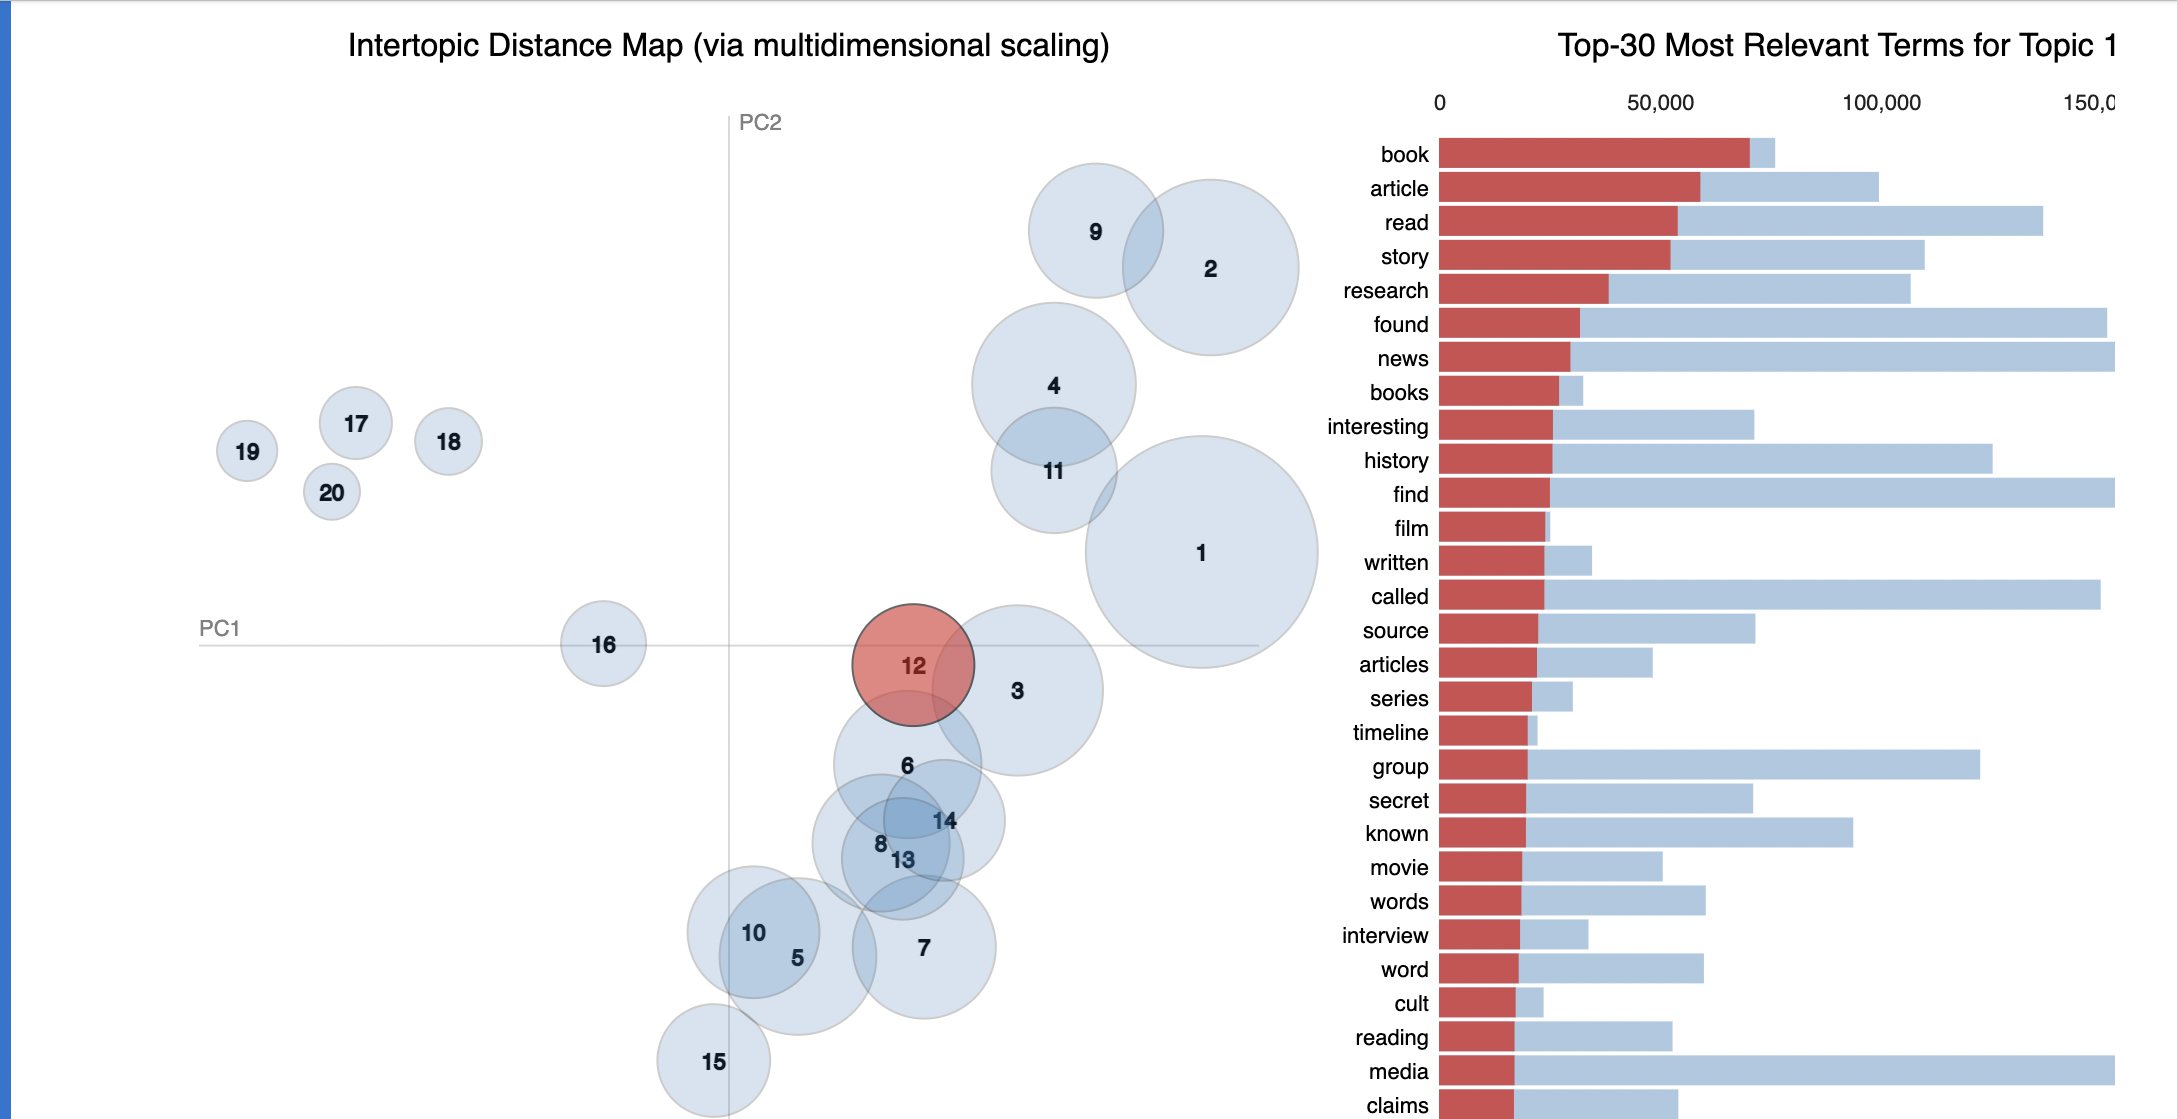

In [49]:
from IPython.display import Image 
Image("subimg1.png")
#Figure 1: Topic Model, Topic 12, "Secret"

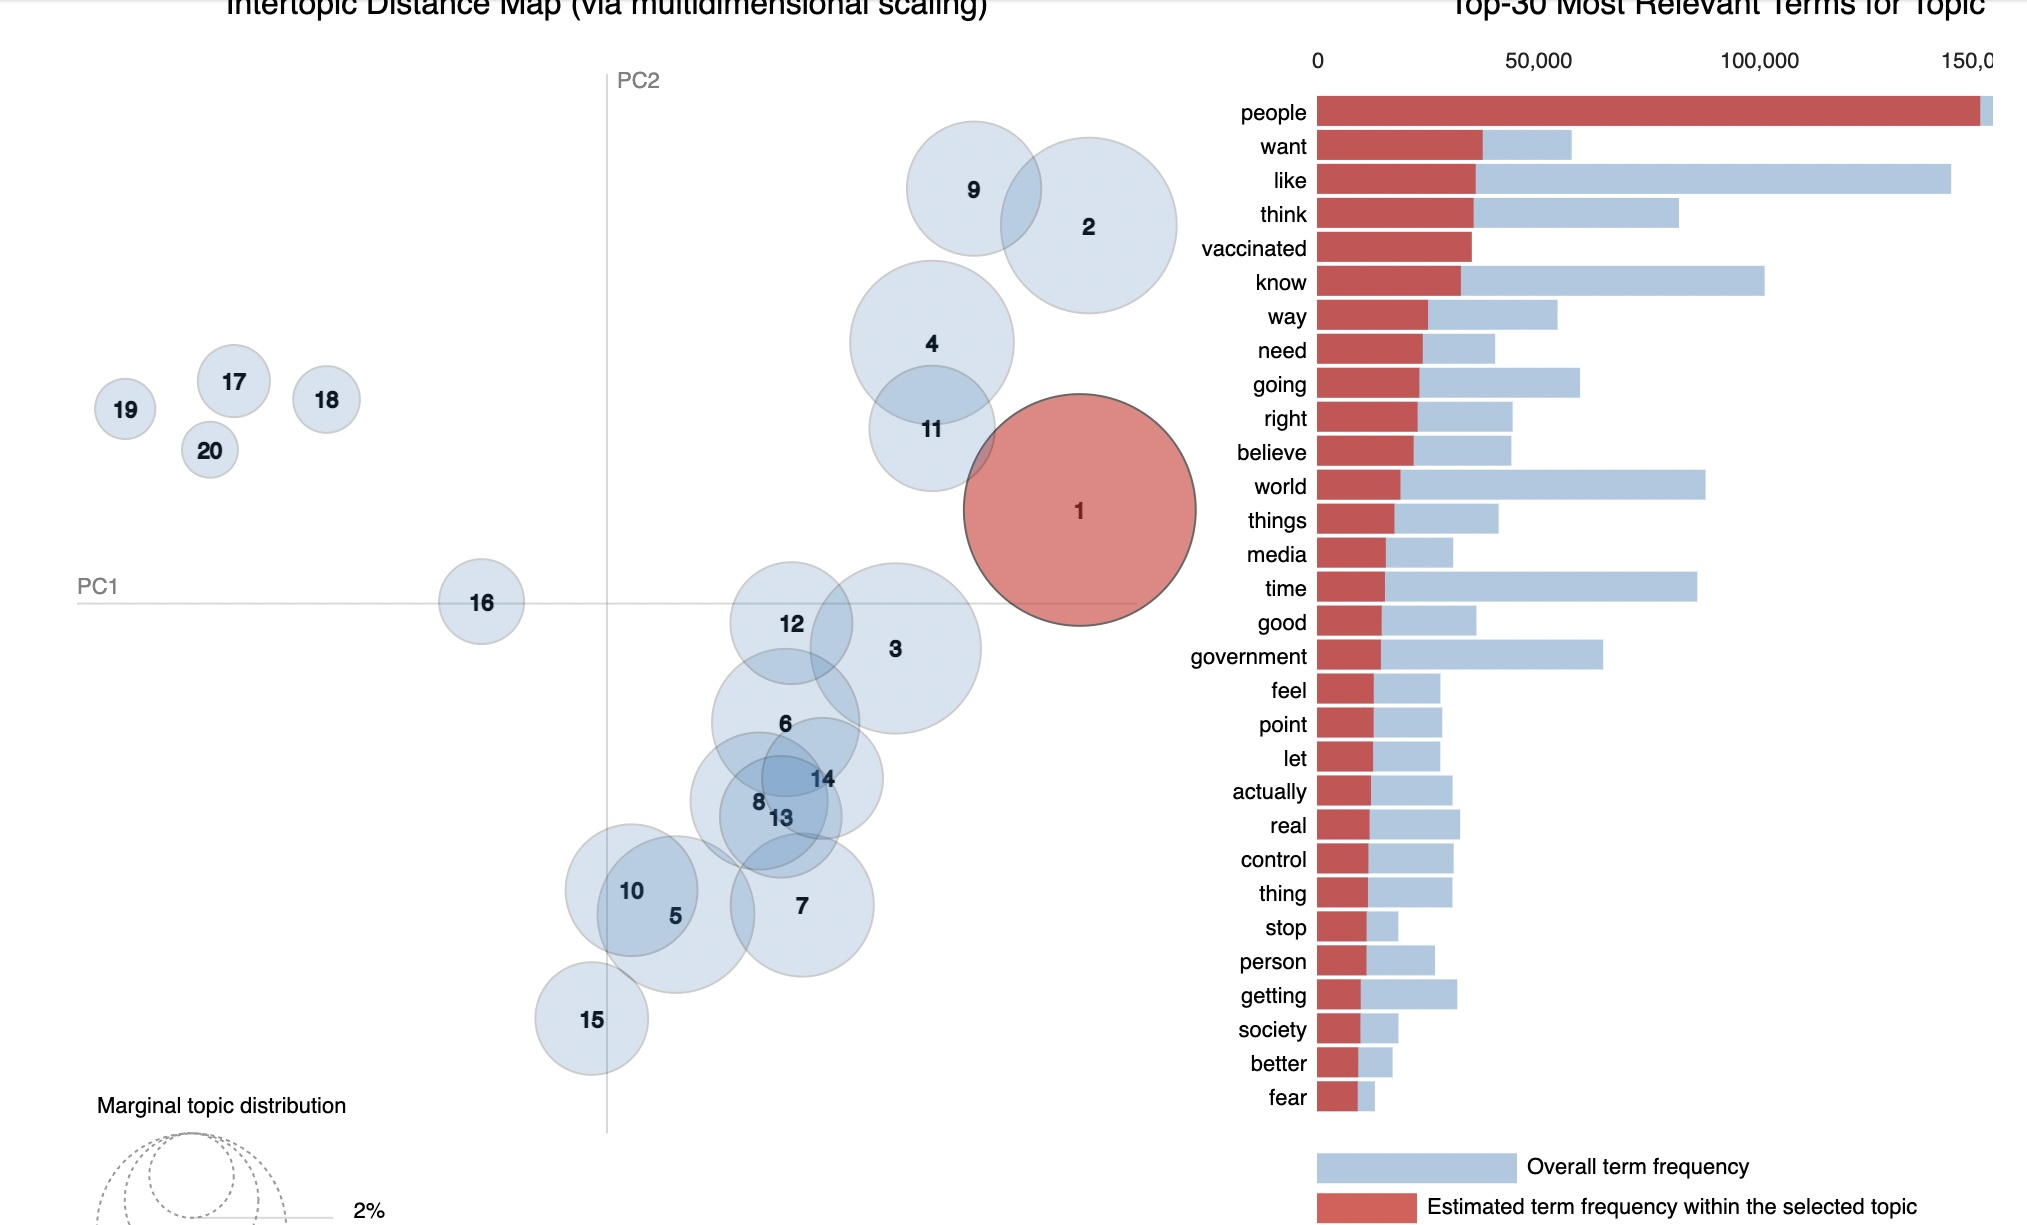

In [6]:
from IPython.display import Image 
Image("subimg2.jpg")
#Figure 2: Topic Model, Topic 1, "Vaccinated"

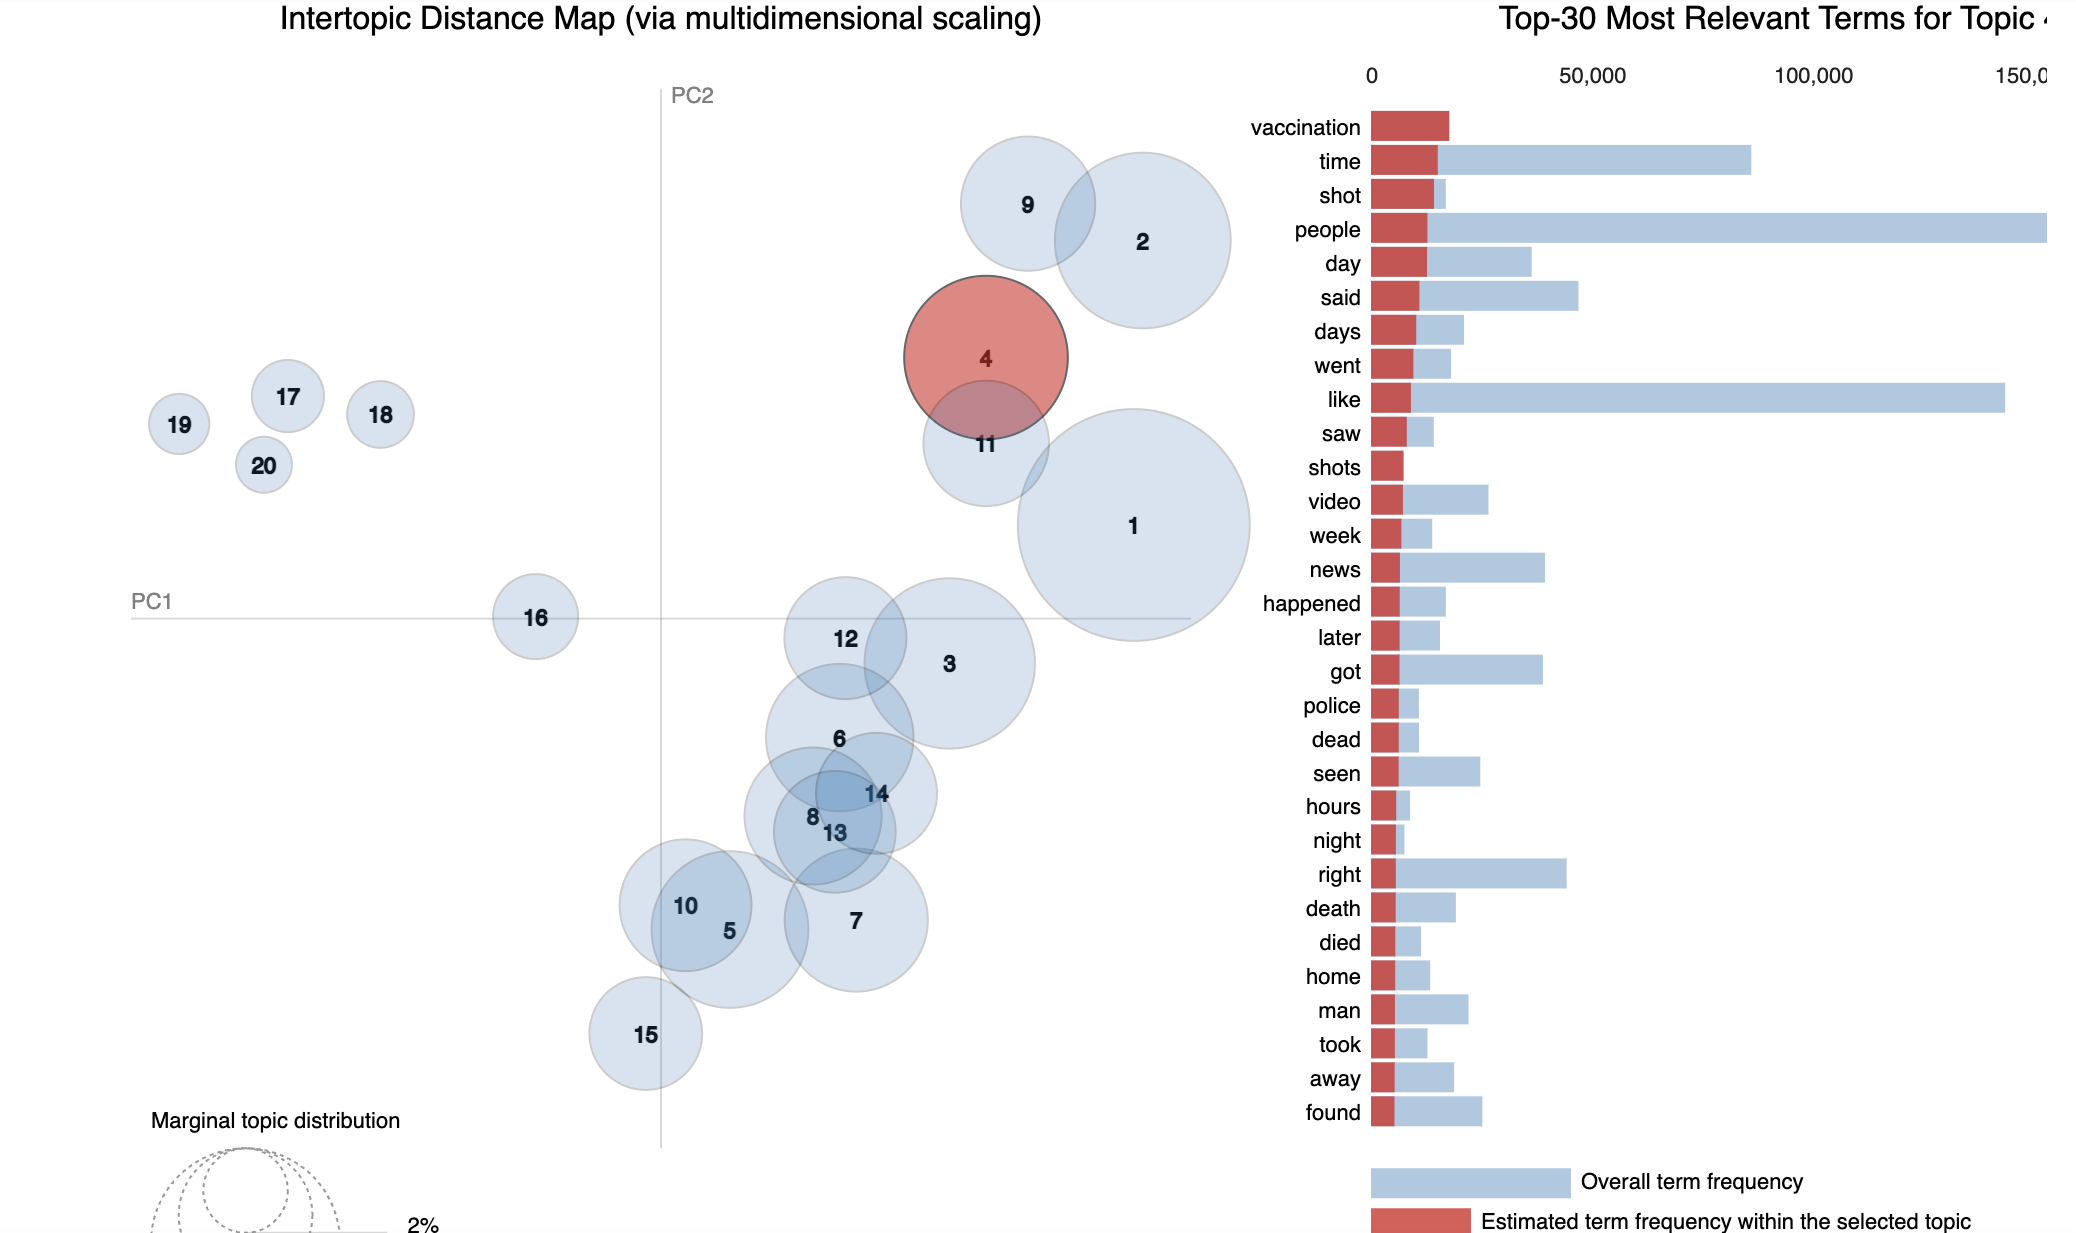

In [7]:
from IPython.display import Image 
Image("subimg3.png")
#Figure 3: Topic Model, Topic 4, "Vaccination"

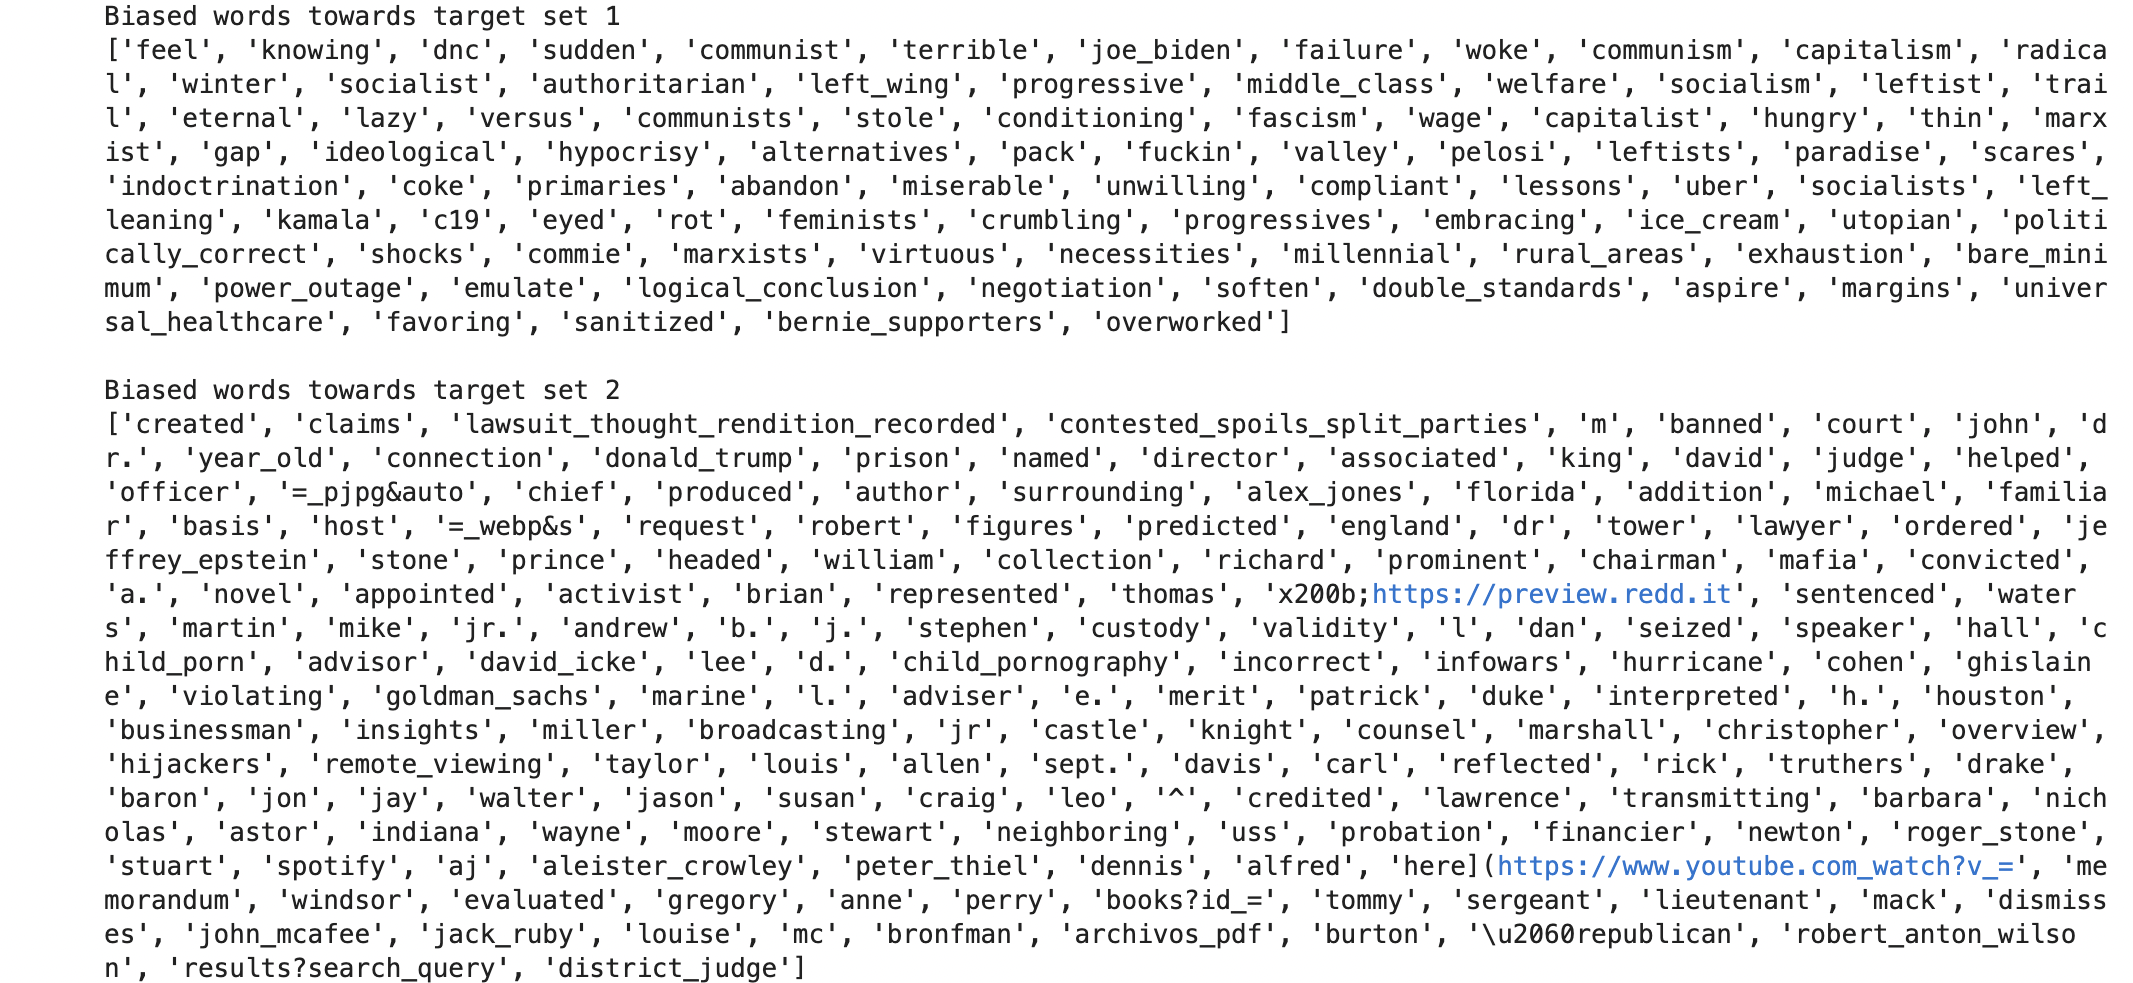

In [8]:
from IPython.display import Image 
Image("subimg4.png")
#Figure 4: Biased Words

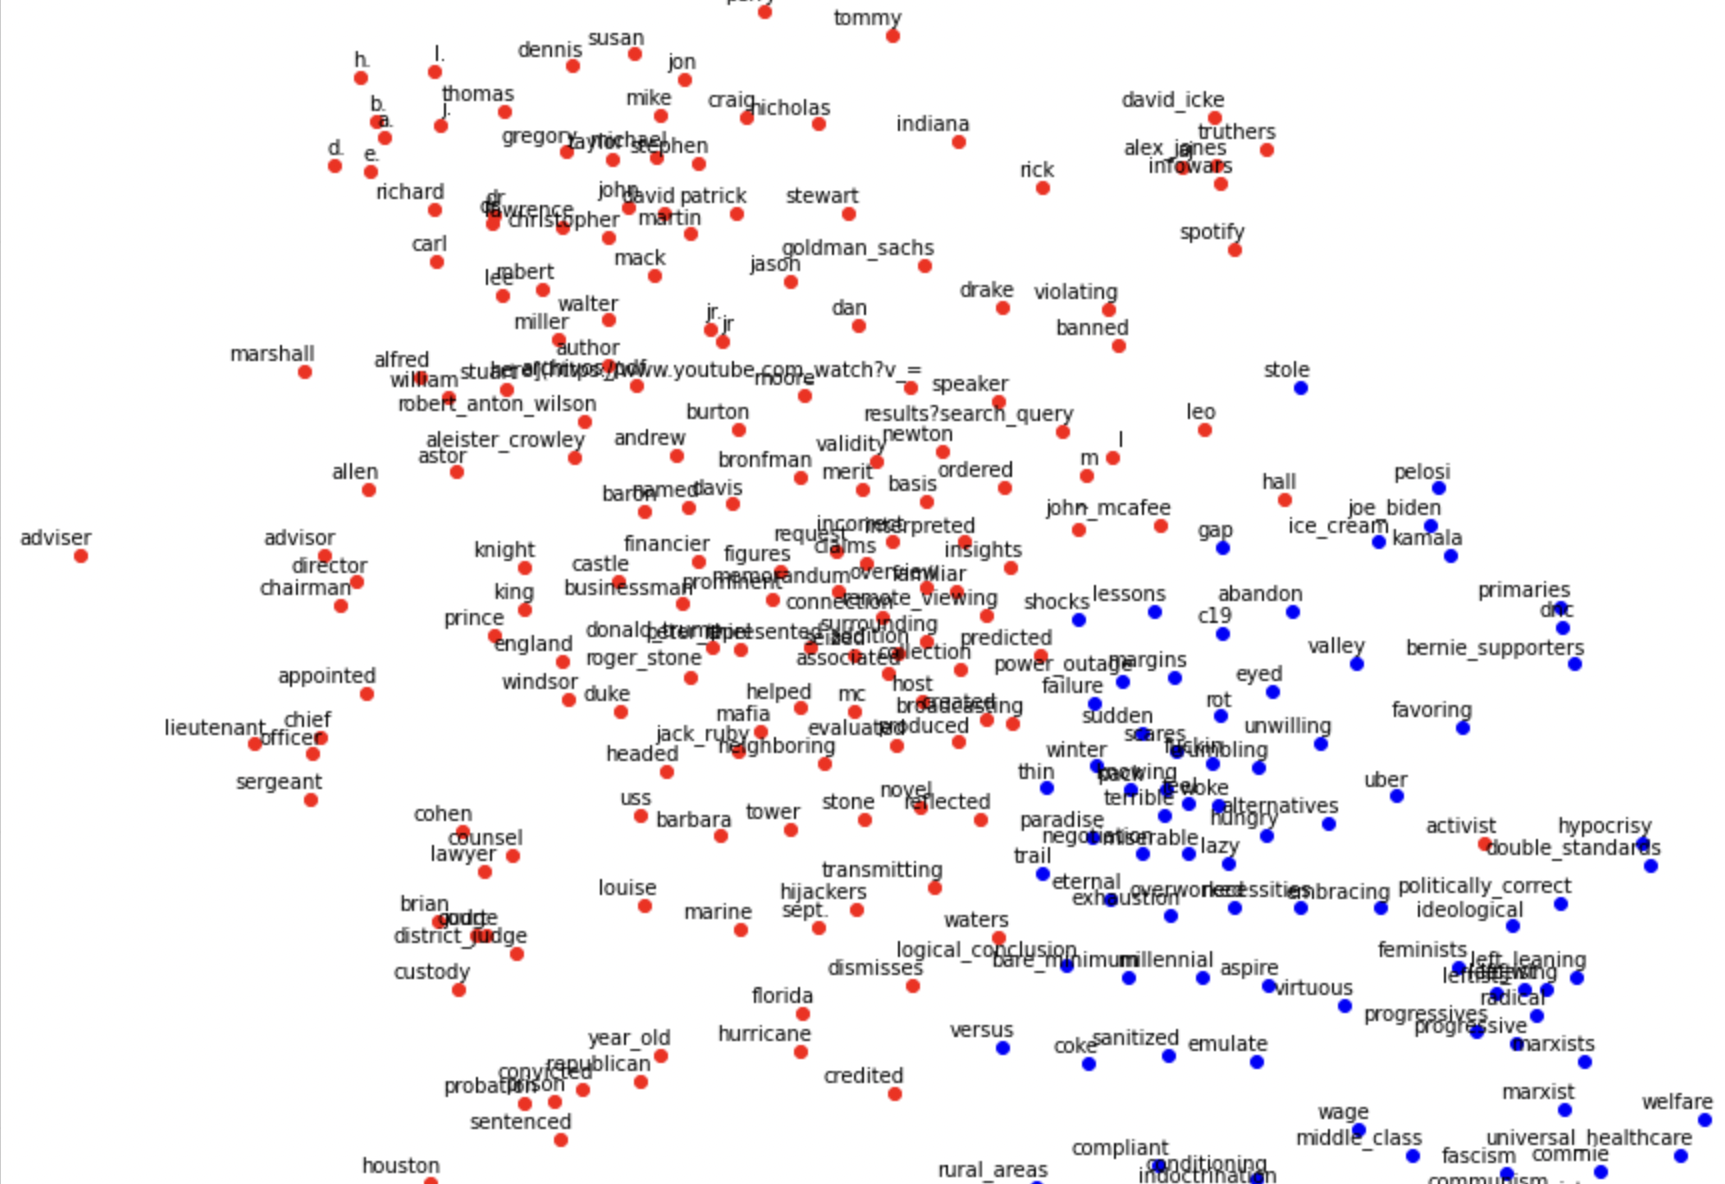

In [9]:
from IPython.display import Image 
Image("subimg5.png")
#Figure 5: Scatter Plot 

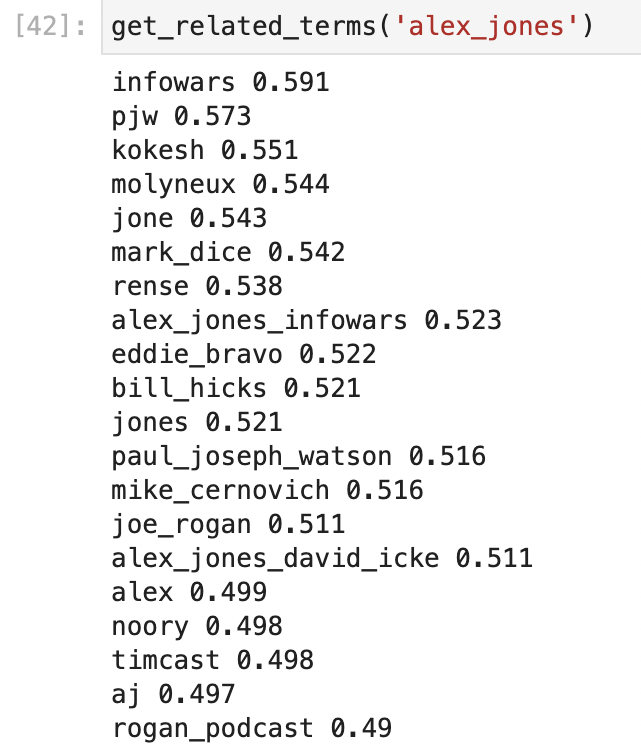

In [10]:
from IPython.display import Image 
Image("subimg6.png")
#Figure 6: Related Terms, Alex Jones 

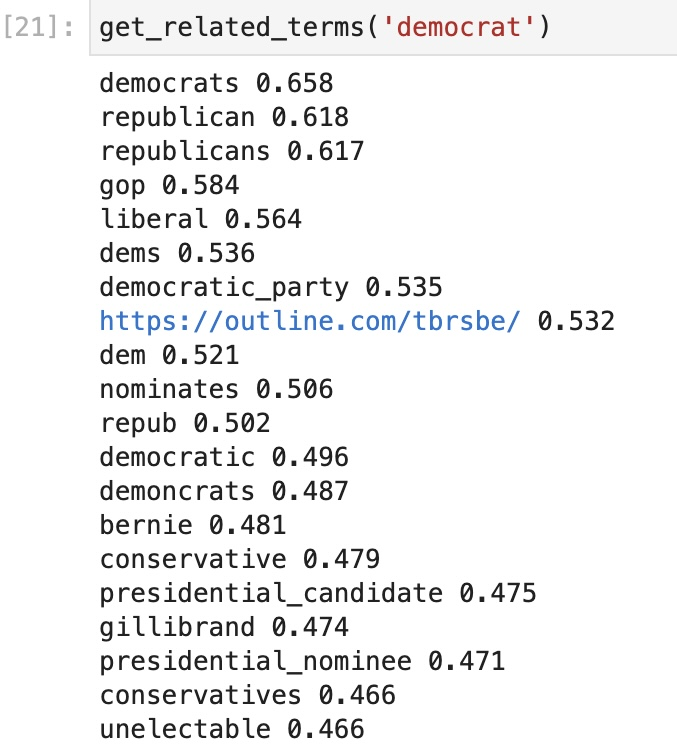

In [12]:
from IPython.display import Image 
Image("subimg7.1.jpg")
#Figure 7: Related Terms, Democrat  

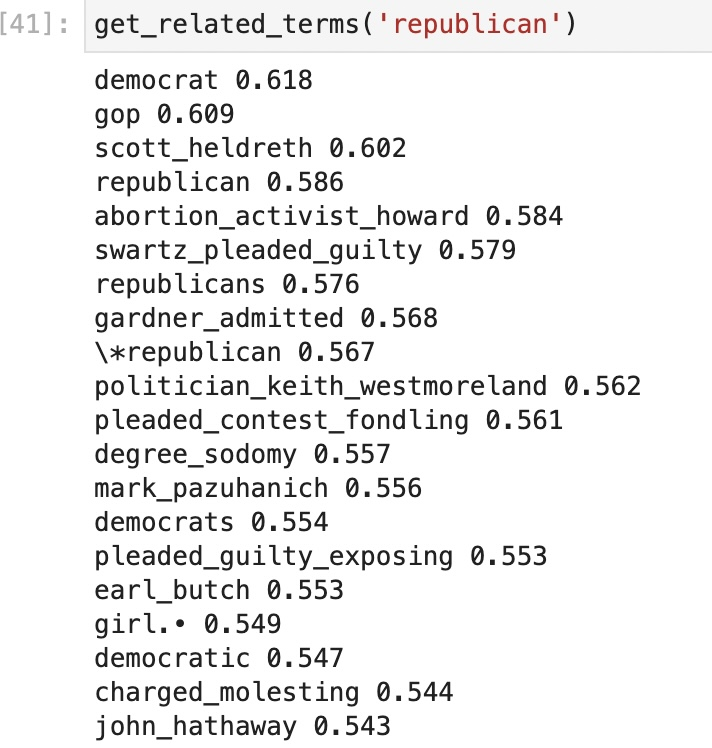

In [13]:
from IPython.display import Image 
Image("subimg8.jpg")
#Figure 8: Related Terms, Republican  

You can embed figures as needed using `<img>` or the markdown syntax.

## Conclusions
   In conclusion, the conspiracy theory subreddit community is brimming with theories using mythological speech and political bias. With the aid of machine learning, I found that submissions on this subreddit generally agree with Republican viewpoints and politicians more than Democratic viewpoints and politicians. However, the subreddit still discusses conspiracies and news about the Republican party and its politicians. Overall, the conspiracy theory subreddit, r/Conspiracy, is a reflection of the discourse and viewpoints of the general public from the ages of 18 to 29, but because of the bias that comes with select people posting their opinions, those who tend to theorize major events and disagree with popular explanations of events lean more towards one party’s beliefs than the other. Throughout my research, my approach changed as I found different techniques that may show political bias in rhetoric a little more clearly, like related terms and language bias rather than topic modeling. These findings may come with some flaws as the generated results are from a portion of submissions to the subreddit, and not all submissions posted. To take this research further, I'd like to see a deeper investigation of the r/Conspiracy subreddit using machine learning to attempt to group users and submissions based on similar political beliefs and compare the number of posts in each group. It would also be worthwhile to use surveys or other online discussion platforms to compare the views of users within the r/Conspiracy subreddit to those in real life or of a different age range. The most important message to take from this research is to be cautious when reading posts online, as discussions about politics and conspiracies are often rooted in false information and political bias. 

## References

Anderson, William. “The Attempt to Prosecute Donald Trump Is Unleashing More than Our Political System Can Handle.” Infowars, Infowars, 13 Aug. 2022, https://www.infowars.com/posts/the-attempt-to-prosecute-donald-trump-is-unleashing-more-than-our-political-system-can-handle/.

Barthes. “Barthes' Mythologies.” https://doi.org/10.4324/9780203568422.

Cambridge English Dictionary . “Truther.” TRUTHER | Definition in the Cambridge English Dictionary, https://dictionary.cambridge.org/us/dictionary/english/truther.

Klein. Pathways to Conspiracy: The Social and Linguistic Precursors of ... https://www.researchgate.net/publication/337359023_Pathways_to_conspiracy_The_social_and_linguistic_precursors_of_involvement_in_Reddit's_conspiracy_theory_forum/fulltext/5dd3ef2fa6fdcc3789772359/Pathways-to-conspiracy-The-social-and-linguistic-precursors-of-involvement-in-Reddits-conspiracy-theory-forum.pdf.

Mambrol, Nasrullah. “Roland Barthes' Concept of Mythologies.” Literary Theory and Criticism, 13 Feb. 2019, https://literariness.org/2016/03/21/roland-barthes-concept-of-mythologies/#:~:text=Barthes%20considers%20myth%20as%20a,signifying%20system%20as%20its%20signifier.

McBreen, Kelen. “Covid Jab Cover-up: CDC Quietly Removes Sentence Claiming 'Mrna & Spike Protein' Don't Last Long in Body.” Infowars, Infowars, 15 Aug. 2022, https://www.infowars.com/posts/covid-jab-cover-up-cdc-quietly-removes-sentence-claiming-mrna-spike-protein-dont-last-long-in-body/.

Oregon State Legislature. Oregon State Legislature, https://www.oregonlegislature.gov/bills_laws/ors/ors163.html.

Reid, Scott A.. "conspiracy theory". Encyclopedia Britannica, 2 Jun. 2022, https://www.britannica.com/topic/conspiracy-theory. Accessed 13 August 2022

SPLC. “Extremists.” Southern Poverty Law Center, https://www.splcenter.org/fighting-hate/extremist-files/individual/andre.

Todorov, Georgi, and Georgi TodorovGeorgi Todorov is the founder of ThriveMyWay. “70+ Important Reddit Statistics 2022.” Learn Digital Marketing, 11 May 2022, https://thrivemyway.com/reddit-statistics/#:~:text=Reddit%20User%20Demographic%20Statistics&text=People%20between%20the%20age%20of,not%20very%20active%20on%20Reddit.

u/Alex-E-Jones. “R/Conspiracy - Starting an Infowars/Alex Jones Subreddit.” Reddit, https://www.reddit.com/r/conspiracy/comments/obbbwz/starting_an_infowarsalex_jones_subreddit/.

u/Benjanon_Franklin. “R/Conspiracy - Our Government Is over Ran by Sick People. When Are We Going to Demand Justice!” Reddit, https://www.reddit.com/r/conspiracy/comments/r8szbd/our_government_is_over_ran_by_sick_people_when/.

u/deleted. “R/Conspiracy - They Will Block Infowars and All Conservative Sites the Way They Just Blocked RT.” Reddit, https://www.reddit.com/r/conspiracy/comments/td1zrz/they_will_block_infowars_and_all_conservative/.

u/MangoSmash. “R/Conspiracy - the New CDC Guidance, ‘Unvaccinated People Now Have the Same Guidance as Vaccinated People’ - Acknowledges There Never Was a ‘Vaccine.".” Reddit, https://www.reddit.com/r/conspiracy/comments/wng5mx/the_new_cdc_guidance_unvaccinated_people_now_have/.

u/Xianbi. “R/Conspiracy - I Can't Wait for AOC to Lie under Oath. I Seriously Can't Believe Demoncrats Voted for Witnesses Lmao. #Lockherup.” Reddit, https://www.reddit.com/r/conspiracy/comments/ljbgoa/i_cant_wait_for_aoc_to_lie_under_oath_i_seriously/. 

